# Sequential API vs Functional API model in Keras



In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist  

In [4]:
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

In [7]:
X_valid, X_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

## Creating Sequential API model:

In [8]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(256, activation="relu"))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [10]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [11]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics=["accuracy"])

In [12]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6170 - accuracy: 0.8436 - val_loss: 0.3082 - val_accuracy: 0.9180
Epoch 2/20
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2891 - accuracy: 0.9172 - val_loss: 0.2410 - val_accuracy: 0.9334
Epoch 3/20
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2347 - accuracy: 0.9325 - val_loss: 0.2013 - val_accuracy: 0.9424
Epoch 4/20
1719/1719 [==============================] - 13s 8ms/step - loss: 0.1989 - accuracy: 0.9439 - val_loss: 0.1805 - val_accuracy: 0.9500
Epoch 5/20
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1730 - accuracy: 0.9508 - val_loss: 0.1646 - val_accuracy: 0.9554
Epoch 6/20
1719/1719 [==============================] - 17s 10ms/step - loss: 0.1537 - accuracy: 0.9559 - val_loss: 0.1454 - val_accuracy: 0.9590
Epoch 7/20
1719/1719 [==============================] - 15s 9ms/step - loss: 0.1370 - accuracy: 0.9616 - val_loss: 0.1329 - val_ac

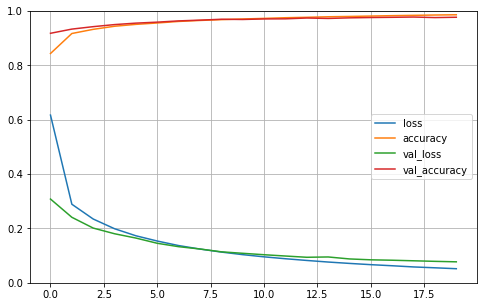

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

## Creating Functional API model:

In [14]:
input_ = keras.layers.Input(shape=[28, 28])
flatten = keras.layers.Flatten(input_shape=[28, 28])(input_)
hidden1 = keras.layers.Dense(2**14, activation="relu")(flatten)
hidden2 = keras.layers.Dense(512, activation='relu')(hidden1)
hidden3 = keras.layers.Dense(28*28, activation='relu')(hidden2)
reshap = keras.layers.Reshape((28, 28))(hidden3)
concat_ = keras.layers.Concatenate()([input_, reshap])
flatten2 = keras.layers.Flatten(input_shape=[28, 28])(concat_)
output = keras.layers.Dense(10, activation='softmax')(flatten2)
model = keras.Model(inputs=[input_], outputs=[output] )

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 784)          0           input_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 16384)        12861440    flatten_1[0][0]                  
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 512)          8389120     dense_3[0][0]                    
______________________________________________________________________________________________

In [16]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [17]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics=["accuracy"])
h = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 606s 352ms/step - loss: 0.5756 - accuracy: 0.8591 - val_loss: 0.2919 - val_accuracy: 0.9200
Epoch 2/10
 475/1719 [=======>......................] - ETA: 7:09 - loss: 0.2851 - accuracy: 0.9180

KeyboardInterrupt: 

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

In [ ]:

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

In [ ]:
input_A = keras.layers.Input(shape=[28, 28])
input_B = keras.layers.Input(shape=[28, 28])

flatten = keras.layers.Flatten(input_shape=[28, 28])(input_A)
hidden1 = keras.layers.Dense(2**14, activation="relu")(flatten)
hidden2 = keras.layers.Dense(512, activation='relu')(hidden1)
hidden3 = keras.layers.Dense(28*28, activation='relu')(hidden2)
reshap = keras.layers.Reshape((28, 28))(hidden3)
concat_A = keras.layers.Concatenate()([input_A, reshap])
flatten_A = keras.layers.Flatten(input_shape=[28, 28])(concat_A)
output = keras.layers.Dense(10, activation='softmax')(flatten_A)


concat_B = keras.layers.Concatenate()([input_B, reshap])
flatten_B = keras.layers.Flatten(input_shape=[28, 28])(concat_B)

hidden_B = keras.layers.Dense(512, activation='relu')(flatten_B)
output_2nd = keras.layers.Dense(10, activation='softmax')(hidden_B)

In [ ]:
X_train_A, X_train_B = X_train[:-27500], X_train[-27500:]
y_train_A, y_train_B = y_train[:-27500], y_train[-27500:]

In [ ]:
model = keras.Model(inputs=[input_A, input_B], outputs=[output, output_2nd])

In [ ]:
model.compile(loss=["sparse_categorical_crossentropy", "sparse_categorical_crossentropy"],
                     optimizer="sgd", metrics=["accuracy"])

h = model.fit([X_train_A, X_train_B], [y_train_A, y_train_B], epochs=10, validation_split= 0.2 )
